In [28]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 # 读取数据
df = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\空值填补后数据集.csv", encoding='gb18030')
 # 将 'date' 列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])
 # 添加年、月、日列
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

data = df
y = data['AQI指数']
x = data.drop(['AQI指数','date'], axis=1)
 # 进行BOX-COX变换
y = stats.boxcox(y)[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 33)

[19:57:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

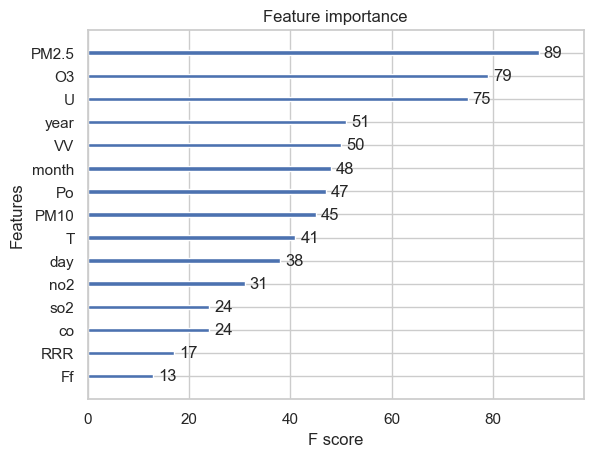

In [29]:
feature_names = ['PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po', 'U', 'Ff', 'VV', 'RRR', 'year', 'month', 'day']
# 初始化XGBRegressor对象并传递特征名称
xgb = XGBRegressor(feature_names=feature_names)
# 训练模型
xgb.fit(X_train, y_train)
# 使用plot_importance函数查看特征重要性
plot_importance(xgb)

In [33]:
 #构建随机森林模型
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
 #训练模型
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

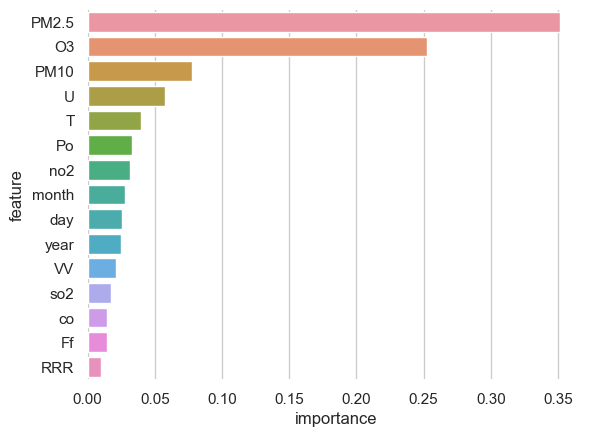

In [38]:
# 获取特征重要性列表
importances_1 = model.feature_importances_
feature_names_1 = x.columns.tolist()

# 构建DataFrame并按特征重要性排序
df_importances_1 = pd.DataFrame({"feature": feature_names_1, "importance": importances_1})
df_importances_1.sort_values("importance", inplace=True, ascending=False)
df_importances_1.reset_index(drop=True, inplace=True)

# 可视化特征重要性
sns.set(style="whitegrid")
sns.barplot(x="importance", y="feature", data=df_importances_1)
sns.despine(left=True, bottom=True)
plt.show()